In [8]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-diabities/diabetes.csv


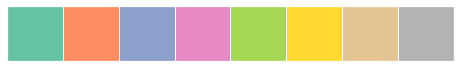

In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from warnings import simplefilter
simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", font_scale=1.2)
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 7)

# # Setting the color pallete
# netPal = sns.light_palette('#E50914', 10, reverse= True)

sns.set_palette(sns.color_palette("Set2"))
sns.palplot(sns.color_palette("Set2"))

In [16]:
df = pd.read_csv("/kaggle/input/predict-diabities/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Useful Insights

<AxesSubplot:>

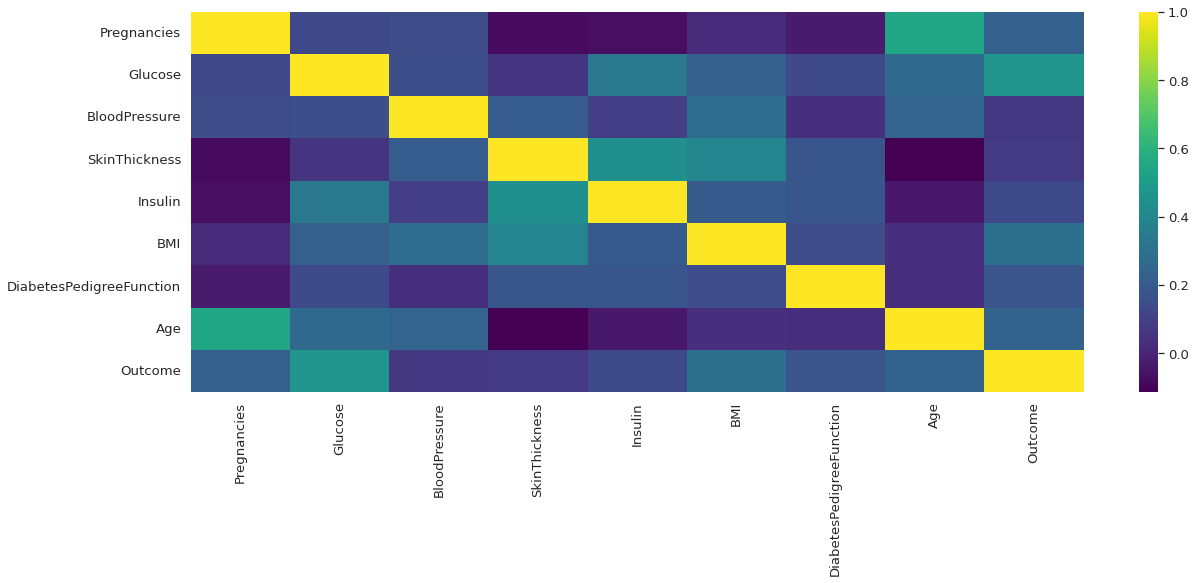

In [96]:
sns.heatmap(df.corr(), cmap = "viridis")

[Text(0.5, 1.0, 'No of Pregancies and the likeliness of Diabities')]

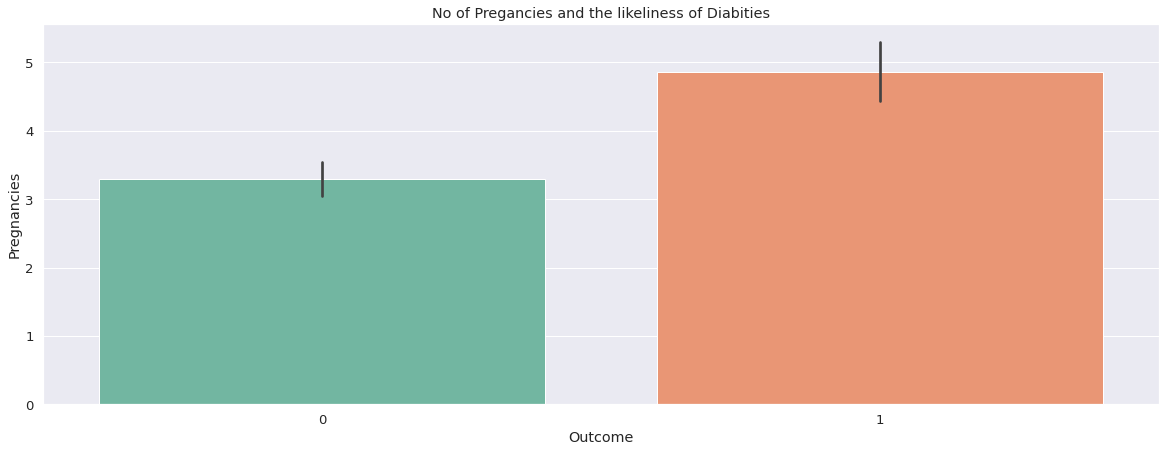

In [97]:
sns.barplot(data = df, y  = "Pregnancies", x = "Outcome").set(
    title = "No of Pregancies and the likeliness of Diabities"
)

#### Women with more preganices are more likey to be diabetic

[Text(0.5, 1.0, 'Diabetic outcome w.r.t Body Glucose Level')]

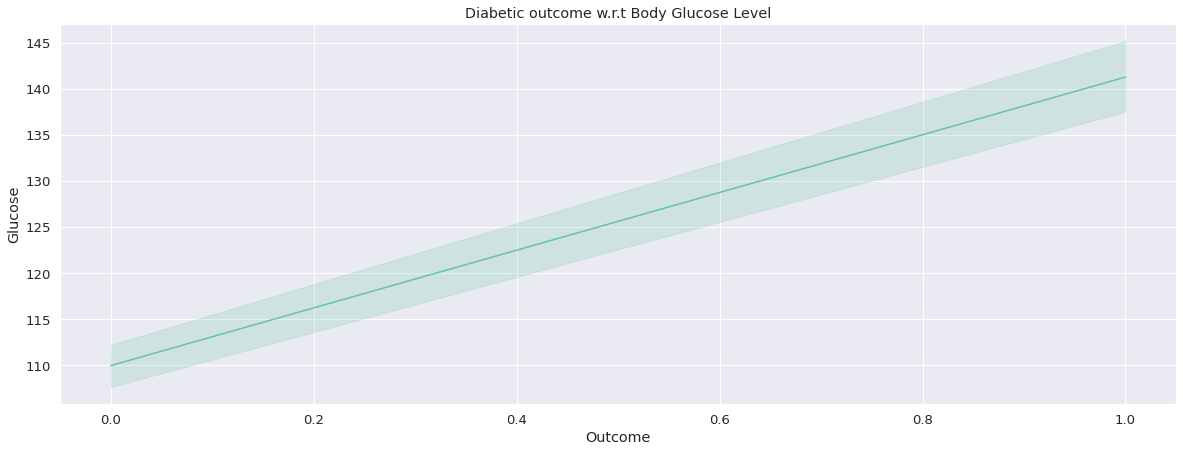

In [98]:
sns.lineplot(data = df, y  = "Glucose", x = "Outcome").set(
    title = "Diabetic outcome w.r.t Body Glucose Level"
)

[Text(0.5, 1.0, 'Diabetic outcome w.r.t Body Insulin Level')]

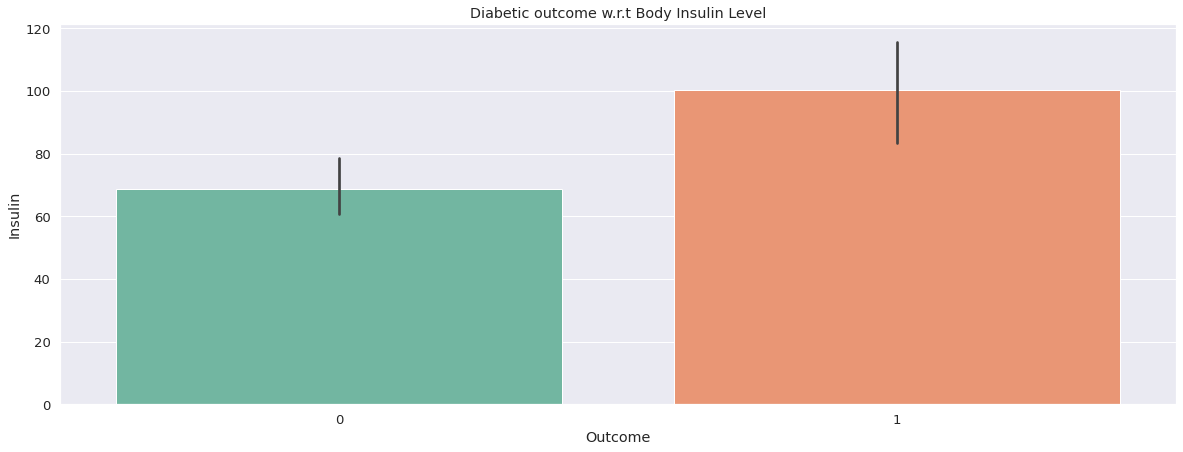

In [99]:
sns.barplot(data = df, y  = "Insulin", x = "Outcome").set(
    title = "Diabetic outcome w.r.t Body Insulin Level"
)

[Text(0.5, 1.0, 'Diabetic outcome w.r.t DiabetesPedigreeFunction')]

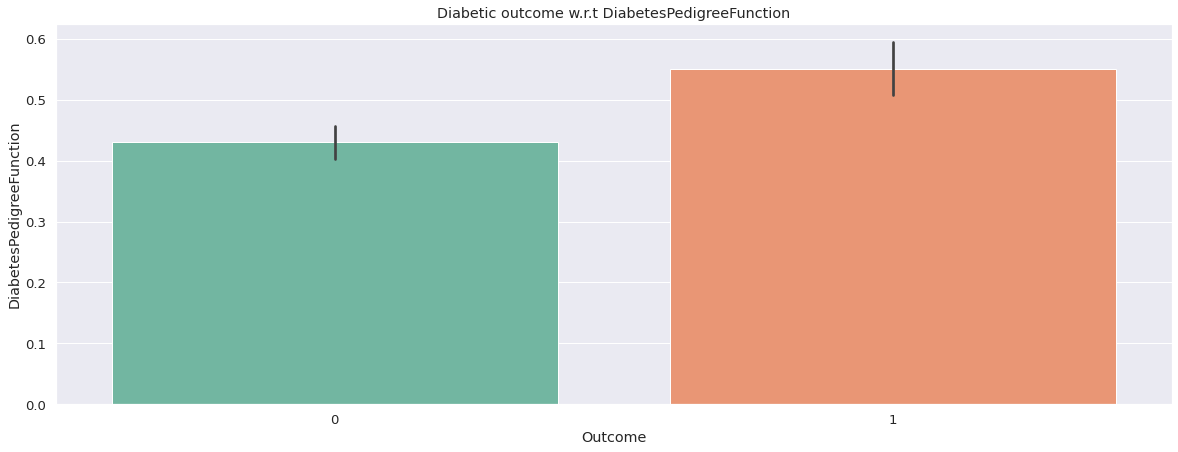

In [100]:
sns.barplot(data = df, y  = "DiabetesPedigreeFunction", x = "Outcome").set(
    title = "Diabetic outcome w.r.t DiabetesPedigreeFunction"
)

[Text(0.5, 1.0, 'Likeliness of Diabetes w.r.t Age')]

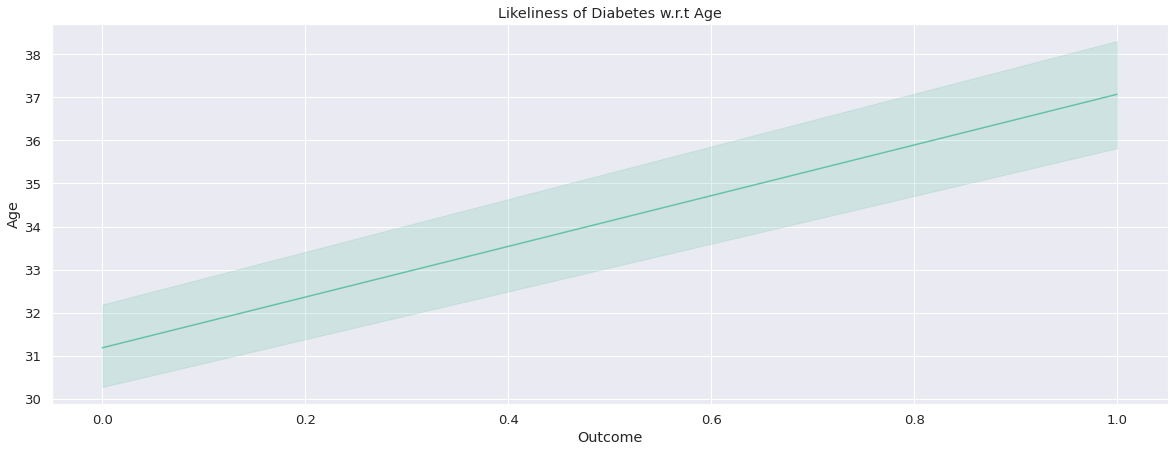

In [101]:
sns.lineplot(data = df, y  = "Age", x = "Outcome").set(
    title = "Likeliness of Diabetes w.r.t Age"
)

There is a higher chance of being diagnosed with diabeties for women in their late 30

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
x = df.drop("Outcome", axis = 1)
y = df.Outcome
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)

# Training the Model

### DecisionTreeClassifier

In [109]:
# Function to measure the accuracy

def accuracyPoints(yTest, yPreds):
    accuracy = accuracy_score(yTest, yPreds)
    cm = confusion_matrix(yTest, yPreds)
    print(f"Accuracy Score : {accuracy}")
    print("Confusion Matrix")
    sns.heatmap(cm, annot = True, cmap= "viridis")
    

Accuracy Score : 0.7467532467532467
Confusion Matrix


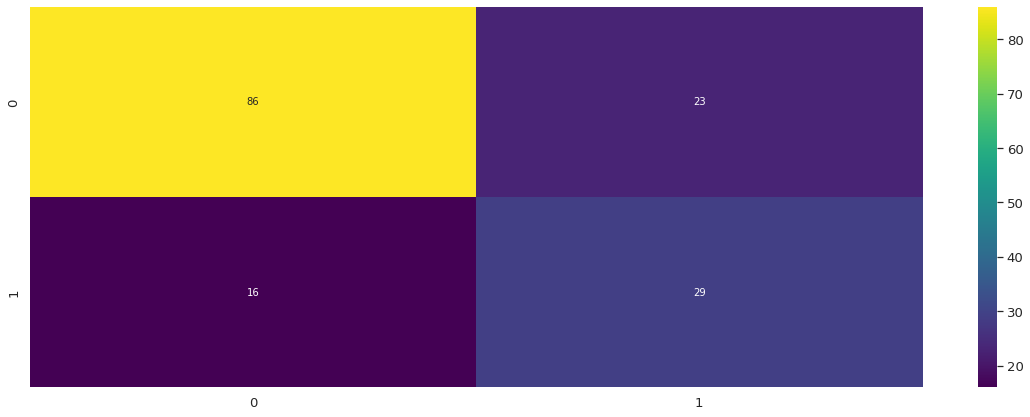

In [110]:
dtc = DecisionTreeClassifier()
dtc.fit(xTrain, yTrain)
preds = dtc.predict(xTest)

accuracyPoints(yTest, preds)


Accuracy Score : 0.7337662337662337
Confusion Matrix


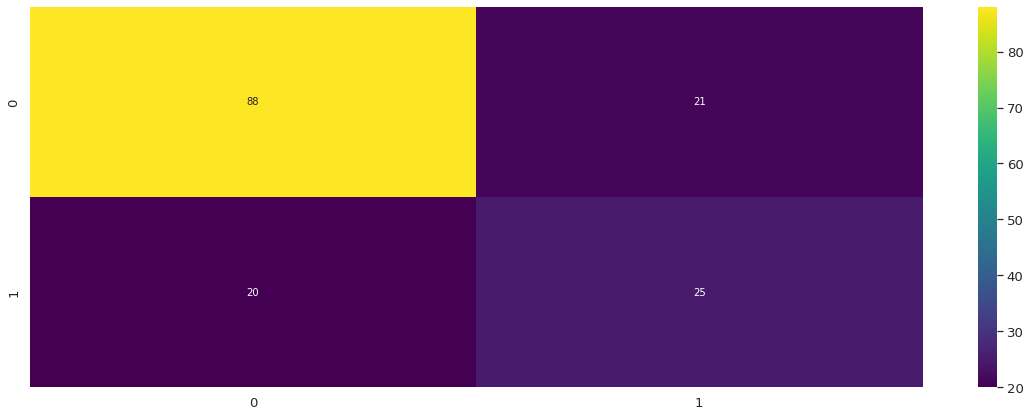

In [111]:
gbc = GradientBoostingClassifier()
gbc.fit(xTrain, yTrain)
preds = gbc.predict(xTest)

accuracyPoints(yTest, preds)

Accuracy Score : 0.7662337662337663
Confusion Matrix


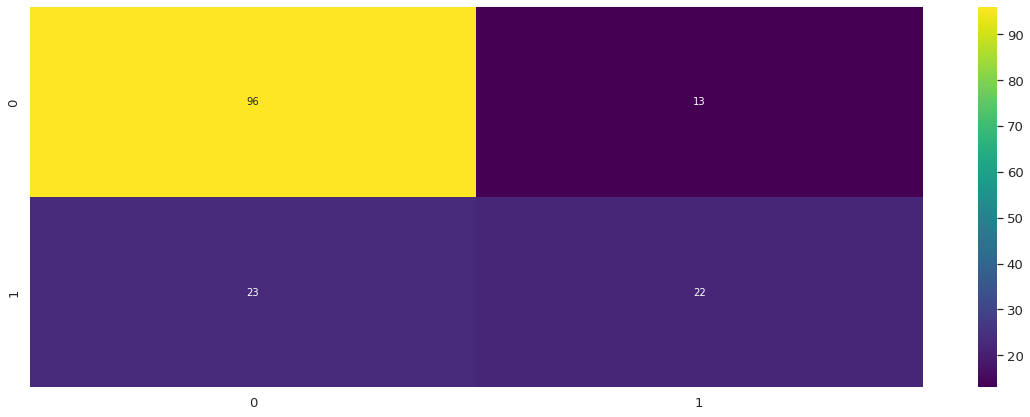

In [112]:
lgm = LogisticRegression()
lgm.fit(xTrain, yTrain)
preds = lgm.predict(xTest)

accuracyPoints(yTest, preds)

We will go with the Logistic regression model

In [113]:
lgm.predict(xTest)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])